## Logo del Tec

## Proyecto Integrador
## Smart Travel Assistant: Optimizando la Experiencia de Viaje con IA

### Equipo 37
##### A00759664 - Joel Orlando Hernández Ramos	
##### A01793486 - Juan Carlos Alvarado Carricarte
##### A00260430 - Juan Carlos Romo Cárdenas


**Cargando Conjunto de Datos**

In [1]:
# Importando librerias requeridas
import pyarrow.parquet as pq
import pandas as pd
import numpy as np


In [2]:
# Cargando conjunto de datos de hoteles como un Dataset multi-parte de Apache Parquet
dataset = pq.ParquetDataset('hotel-dataset')
table = dataset.read()

In [3]:
# Creando un Dataframe de Pandas para el analisis
dataframe = table.to_pandas()


**Estadisticas Resumidas del Conjunto de Datos**

El conjunto de datos de informacion de hoteles contiene mas de un millon novecientos tres mil registros con 14 columnas. Las columnas incluyen valores como la descripcion del hotel, el numero de estrellas del hotel, la direccion del hotel, el codigo del pais donde se localiza el hotel y sus coordenadas geograficas, entre otras.

Para crear la base de conocimientos en AWS Bedrock se esperan usar los siguientes campos o columnas:
* Nombre del hotel
* Descripción del hotel
* Nombre de la ciudad donde se ubica el hotel
* Código del país donde se ubica el hotel
* Nivel del hotel (rating)

Otros piezas de informacion que se pudieran usar incluyen:
* Longitud y Latitud


Uno de los parametros importantes para crear una base de conocimiento para RAG es el tamanio del texto a caracteres, or *chunck size*. Para este efecto se agregara una nueva columna con el tamanio de la descripcion del hotel en caracteres.



In [4]:
# Calculando el tamanio en caracteres de la descripcion del hotel
dataframe['DescLength'] = dataframe['Description'].str.len()


In [5]:
# Desplegando un resumen estadisticos de los datos
dataframe.describe(include='all')

,HotelCode,HotelName,Description,Address,Pincode,CountryCode,PhoneNumber,CityName,Longitude,Latitude,HotelRating,uuid,match_id,match_confidence_score,DescLength
count,1093095,1093095,1093095,1093095,1093095,1093095,742223,1093095,1090879,1093095,1.093052e+06,1093095,1.093095e+06,24688.0,1.093095e+06
unique,1093095,994885,1025518,1060951,178491,441,612681,100184,1009164,980655,NaN,1093095,NaN,NaN,NaN
top,1688289,quality inn,<br/><b>Disclaimer notification: Amenities are...,"510 gulf shore drive, , destin, 32541, usa",,US,91-93-13931393,Rome,-86.49782,,NaN,e8558524-a7e1-4c2c-a4aa-afaa8adc2563,NaN,NaN,NaN
freq,1,373,62806,94,40804,116324,6690,7937,94,2217,NaN,1,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.772850e+01,NaN,2.839610e+12,1.0,1.356845e+03
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.784483e+04,NaN,1.744277e+12,0.0,5.874179e+02
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,0.000000e+00,1.0,0.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,1.322850e+12,1.0,9.770000e+02
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000e+00,NaN,2.843268e+12,1.0,1.383000e+03
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000e+00,NaN,4.355097e+12,1.0,1.750000e+03


La descripcion extendida de los datos almacenados en en conjunto de datos indica que:
* Hay 1,093,095 registros con 14 columnas
* Las columnas *PhoneNumber* y *Longitude* tienen valores ausentes
* El nivel promedio de estrellas de los hoteles es por encima de 4 estrellas de acuerdo a la media de *HotelRating*
* El tamanio promedio en caracteres de las descripcion de un hotel es 1,356 de acuerdo a la media de *DescLength*, aunque hay descripciones vacias basados en el valor minimo de cero (0) de la misma columna


In [6]:
# Desplegando los tipos de valor almacenados en las diferentes columnas con contador de valores no ausentes
dataframe.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093095 entries, 0 to 1093094
Data columns (total 15 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   HotelCode               1093095 non-null  object 
 1   HotelName               1093095 non-null  object 
 2   Description             1093095 non-null  object 
 3   Address                 1093095 non-null  object 
 4   Pincode                 1093095 non-null  object 
 5   CountryCode             1093095 non-null  object 
 6   PhoneNumber             742223 non-null   object 
 7   CityName                1093095 non-null  object 
 8   Longitude               1090879 non-null  object 
 9   Latitude                1093095 non-null  object 
 10  HotelRating             1093052 non-null  float64
 11  uuid                    1093095 non-null  object 
 12  match_id                1093095 non-null  int64  
 13  match_confidence_score  24688 non-null    float64
 14  De

El desplegado de la informacion del conjunto de datos tambien confirma la cuenta de registros totales y de registros ausentes indicados anteriormente.

In [7]:
# Desplegando una muestra de los valores presentes en el conjunto de datos
dataframe.head()

,HotelCode,HotelName,Description,Address,Pincode,CountryCode,PhoneNumber,CityName,Longitude,Latitude,HotelRating,uuid,match_id,match_confidence_score,DescLength
0,1688289,villa alun,<p>HeadLine : In Seminyak (Batubelig)</p><p>Lo...,"jalan raya batu belig gang kamboja no.2, gang ...",80361,ID,62-812-38144235,Seminyak,115.148258,-8.672673,4.0,e8558524-a7e1-4c2c-a4aa-afaa8adc2563,1005022348356,NaN,2325
1,1863020,house of ahasna,"Located in Katunayaka, House Of Ahasna feature...","air force road, kuranakatunayake 109akatunayak...",11450,lk,None,Katunayaka,79.86482,7.18265,3.0,fe5a67fb-7140-43fc-a62c-b2521f86f257,4741643896104,NaN,732
2,5414820,casa vacanze margherita,Casa Vacanze Margherita is a detached holiday ...,"localita' piricone, , orosei, 08028, italy",08028,IT,None,Orosei,9.6809,40.36094,0.0,86d185f6-1e7b-4a24-8ba2-18e8b0edcf1b,927712937388,NaN,898
3,5758326,casa bethel,"Located in Cobán, in a building dating from 20...","9na avenida 2 07 zona 1 coban, , coban, 16001,...",16001,GT,None,Coban,-90.37927,15.46935,0.0,b93537ec-e148-42b0-9bd9-2347b765f611,5592047420856,NaN,480
4,1116957,pension abc,This quietly located guest house in Berlin off...,"kurfürstenstr. 20, 10785 berlinschöneberg, ber...",10785,DE,(49) 3026949903,Berlin,13.36543,52.49947,3.0,ee2eb159-87a7-4b7b-8b2a-fbcb8d92dcf6,137438955021,NaN,1662


Una revision preliminar de los datos muestra lo siguiente:
* La descripcion del hotel incluye elementos, o tags, de HTML que se tienen que remover
* El codigo del pais donde reside el hotel parece estar basado en el estandard ISO 3166 (ISO, s.f.) de dos letras. Este es un data categorico con una cardinalidad de 249, ya que el estandar ISO 3166 incluye 249 codigos.


**Analisis de Datos Faltantes**



In [8]:
# Determinando columnas con valores ausentes
dataframe.isnull().sum()

HotelCode                       0
HotelName                       0
Description                     0
Address                         0
Pincode                         0
CountryCode                     0
PhoneNumber                350872
CityName                        0
Longitude                    2216
Latitude                        0
HotelRating                    43
uuid                            0
match_id                        0
match_confidence_score    1068407
DescLength                      0
dtype: int64

El analisis preliminar de datos faltantes muestra lo siguiente:
* Aproximadamente tercera parte de los registros, mas de 350 mil, no tiene numeros telefonicos
* Aunque faltan mas de dos mil doscientos valore de logitud, no faltan valors de latitud

A continuacion se hara un analisis de datos categoricos y numericos unicamente, por lo que se creara un conjunto de datos que excluya valores no requeridos.

In [9]:
# Removiendo campos con texto para analisis estadistico
dataframe_analysis = dataframe.drop(['Description','PhoneNumber','CityName','Address','Pincode','uuid','match_id','match_confidence_score'], axis=1)

In [10]:
dataframe_analysis.describe(include='all')

,HotelCode,HotelName,CountryCode,Longitude,Latitude,HotelRating,DescLength
count,1093095,1093095,1093095,1090879,1093095,1.093052e+06,1.093095e+06
unique,1093095,994885,441,1009164,980655,NaN,NaN
top,1688289,quality inn,US,-86.49782,,NaN,NaN
freq,1,373,116324,94,2217,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,4.772850e+01,1.356845e+03
std,NaN,NaN,NaN,NaN,NaN,4.784483e+04,5.874179e+02
min,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,0.000000e+00,9.770000e+02
50%,NaN,NaN,NaN,NaN,NaN,2.000000e+00,1.383000e+03
75%,NaN,NaN,NaN,NaN,NaN,3.000000e+00,1.750000e+03


In [11]:
dataframe_analysis.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093095 entries, 0 to 1093094
Data columns (total 7 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   HotelCode    1093095 non-null  object 
 1   HotelName    1093095 non-null  object 
 2   CountryCode  1093095 non-null  object 
 3   Longitude    1090879 non-null  object 
 4   Latitude     1093095 non-null  object 
 5   HotelRating  1093052 non-null  float64
 6   DescLength   1093095 non-null  int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 58.4+ MB


In [12]:
dataframe_analysis.head()

,HotelCode,HotelName,CountryCode,Longitude,Latitude,HotelRating,DescLength
0,1688289,villa alun,ID,115.148258,-8.672673,4.0,2325
1,1863020,house of ahasna,lk,79.86482,7.18265,3.0,732
2,5414820,casa vacanze margherita,IT,9.6809,40.36094,0.0,898
3,5758326,casa bethel,GT,-90.37927,15.46935,0.0,480
4,1116957,pension abc,DE,13.36543,52.49947,3.0,1662


La descripcion extendida del conjunto de analysis, asi como su informacion desplegada concuerdan con los valores obtenidos del conjunto de datos original.

Como las coordenadas geograficas de longitud y latitud son candidatas para agregarse a la base de conocimiento es pertinente revisar los valores ausentes para ver si hay forma de completarlos.

In [13]:
dataframe.loc[dataframe['Longitude'].isnull()]

,HotelCode,HotelName,Description,Address,Pincode,CountryCode,PhoneNumber,CityName,Longitude,Latitude,HotelRating,uuid,match_id,match_confidence_score,DescLength
352,1944494,sunview lodge & restaurant,<br/><b>Disclaimer notification: Amenities are...,"mombasa road, kibwezi 90137, kibwezi, 90137, k...",90137,KE,None,Kibwezi,None,,0.0,1b539168-5527-45a1-a3e5-dfcdba5c0f90,1760936592369,NaN,121
429,5001876,santubong suites b just like home damai,"<p>Featuring an outdoor swimming pool, a fitne...","jalan sultan tengah, 93050 kuching, malaysia, ...",93050,MY,None,Damai Beach,None,,4.0,d51aa7de-79f8-4ea0-831a-6607a6fdadd3,5643587027080,NaN,532
1432,5002452,hotel salyut,"<p>The hotel ""salute"" was founded in 2007. It ...","tula region, city aleksin, 18, bolotova st., ,...",,RU,None,Aleksin,None,,3.0,9c8143f7-b995-4968-a82f-77258df3ca4b,5643587027641,NaN,504
2031,5020924,atour hotel shanghai pudong lujiazui,<p> This hotel offers a pleasant stay in Shang...,"no. 138 pudong avenue lujiazui, pudong 200000 ...",,CN,None,Shanghai,None,,4.0,a129f8e4-4275-460d-9b47-bb1723a781fc,3341484557220,NaN,954
3066,5016410,premier inn bangor (northern ireland),Whether you’re planning romantic breaks or fam...,"castle avenue, bangor, northern ireland bt20 4...",,GB,None,Bangor,None,,0.0,956944a4-1d0b-4024-b903-90465cd86463,4294967296355,NaN,846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091396,5015364,iris lite corbett,Our core focus is to provide a budget friendly...,"dhikuli village,, ramnagar, ramnagar, 244715",244715,13,6398601206,Ramnagar,None,,3.0,b359cb1b-91ad-44ba-8e35-e6731d02659e,4724464026634,NaN,418
1092511,5007324,jinjiang innselect xinhua road wuhan,<p>While staying at Jinjiang Inn (Wuhan Xinhua...,"no. 162 north jianghan, roadwuhan, nanjing,",,CN,None,NANJING,None,,0.0,92d0a2c3-be2d-4284-97d3-4457138e9a37,4698694222010,NaN,318
1092668,5010802,ji hotel shanghai wujiaochang shiguang road,<p> JI Hotel Shanghai Wujiaochang Shiguang Roa...,"no.635 shiguang road, shanghai, pvg, 0000, sha...",,CN,None,Shanghai,None,,0.0,58917d5c-df4c-4292-bcad-140b71977686,2319282340207,NaN,306
1092679,5021993,bristol hotel podgorica,"<p>Situated in Podgorica, 700 metres from Chur...","2 bore stankovica,, 81000 podgorica, montenegr...",81000,ME,None,Podgorica,None,,0.0,a7d30a6e-a847-4fdc-b4a3-09c7b1cd970f,3289944949646,NaN,1076


Un hallazgo importante del desplegado anterior es que, en los registros donde el valor de longitud no esta presente. la latitud no presenta un valor aun y cuando el analisis de valores ausentes indica que cuenta con valores para todos los registros.

Para poder verificar este hallazgo se convertiran los valores de longitud y latitud a un valor de punto flotante valido o faltante.

In [14]:
# Convirtiendo latitud a un numero
def to_float_number(x):
    try:
        return float(x)
    except:
        return np.nan

dataframe_analysis['Longitude'] = dataframe_analysis['Longitude'].apply(to_float_number) 
dataframe_analysis['Latitude'] = dataframe_analysis['Latitude'].apply(to_float_number)

In [15]:
dataframe_analysis.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093095 entries, 0 to 1093094
Data columns (total 7 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   HotelCode    1093095 non-null  object 
 1   HotelName    1093095 non-null  object 
 2   CountryCode  1093095 non-null  object 
 3   Longitude    1066303 non-null  float64
 4   Latitude     1066296 non-null  float64
 5   HotelRating  1093052 non-null  float64
 6   DescLength   1093095 non-null  int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 58.4+ MB


In [16]:
# Determinando columnas con valores ausentes
dataframe_analysis.isnull().sum()

HotelCode          0
HotelName          0
CountryCode        0
Longitude      26792
Latitude       26799
HotelRating       43
DescLength         0
dtype: int64

Despues de la conversion se puede observar que logitud y latitud tienen una cuenta de valores ausentes similar, aunque no la misma.


Como se menciono anteriormente tambien se noto la columnna *Description* no tiene valores ausentes pero hay valores con un tamanio en caracters de cero (0). Para investigar esta se situacion se creara un nuevo conjunto de datos con datos de hoteles donde el tamanio de la descripsion sea menos de 300 caracteres.

In [17]:
dataframe_desc = dataframe.loc[dataframe['DescLength']<300].drop(['PhoneNumber','CityName','Address','Pincode','uuid','match_id','match_confidence_score'], axis=1)


In [18]:
dataframe_desc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73360 entries, 29 to 1093088
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   HotelCode    73360 non-null  object 
 1   HotelName    73360 non-null  object 
 2   Description  73360 non-null  object 
 3   CountryCode  73360 non-null  object 
 4   Longitude    72911 non-null  object 
 5   Latitude     73360 non-null  object 
 6   HotelRating  73358 non-null  float64
 7   DescLength   73360 non-null  int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 5.0+ MB


In [19]:
dataframe_desc.head(40)

,HotelCode,HotelName,Description,CountryCode,Longitude,Latitude,HotelRating,DescLength
29,5574247,artinov villa,<br/><b>Disclaimer notification: Amenities are...,UA,28.401920318604,49.241844177246,0.0,121
42,5227047,cabanas wualmapu,<br/><b>Disclaimer notification: Amenities are...,CL,-71.97763,-39.27225,3.0,121
69,1100700,lewis grand hotel,<br/><b>Disclaimer notification: Amenities are...,PH,120.577199,15.165388,4.0,121
120,1397984,nour el balad,<br/><b>Disclaimer notification: Amenities are...,EG,32.60036,25.71717,2.0,121
124,5617885,rigofutty vendeghaz,<br/><b>Disclaimer notification: Amenities are...,HU,19.9869624,46.82569881,0.0,121
165,5474897,pokoje goscinne koralik,<br/><b>Disclaimer notification: Amenities are...,PL,19.962448120117,49.294097900391,0.0,121
177,5301104,apartment cesar,<br/><b>Disclaimer notification: Amenities are...,SI,13.89544567,46.28912249,0.0,121
184,5883785,casa baixú caraíva,<br/><b>Disclaimer notification: Amenities are...,BR,-39.14976952,-16.80781346,0.0,121
185,5441589,el vergel,<br/><b>Disclaimer notification: Amenities are...,AR,-57.046329498291,-37.343910217285,0.0,121
196,6186660,bella pensao,<br/><b>Disclaimer notification: Amenities are...,IN,73.7905,15.57383,0.0,121


El desplegado de datos muestra que hay muchos registros con lo que parece ser una descripcion comun.

Se procedera a crear un conjunto de datos con hoteles cuyas descripciones tengan menos de 121 caracteres.

In [20]:
dataframe_desc = dataframe_desc.loc[dataframe_desc['DescLength']<121]

In [21]:
dataframe_desc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105 entries, 26256 to 1069856
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   HotelCode    105 non-null    object 
 1   HotelName    105 non-null    object 
 2   Description  105 non-null    object 
 3   CountryCode  105 non-null    object 
 4   Longitude    105 non-null    object 
 5   Latitude     105 non-null    object 
 6   HotelRating  104 non-null    float64
 7   DescLength   105 non-null    int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 7.4+ KB


In [22]:
dataframe_desc.head(40)

,HotelCode,HotelName,Description,CountryCode,Longitude,Latitude,HotelRating,DescLength
26256,4dWK,tesoro ixtapa all inclusive,<p><b>About the property</b><br /><span></span...,MX,"-101,606","1,766,317",3.0,51
36715,tJ67,americinn by wyndham wisconsin dells,This cosy hotel is set in Wisconsin Rapids Area.,US,"-8,979,388","43,622,463",3.0,48
48092,kD6w,camino real hotel & suites puebla,Rooms Number: 149,MX,"-9,825,305,939","1,901,609,993",4.0,17
51347,L0F5,capital o hotel posada terraza,,MX,"-103,833,908","2,090,864",3.0,0
53828,R4fM,homewood suites by hilton austin round rock tx,,US,"-976,758","304,899",3.0,0
62935,kk3L,ramada by wyndham viscount suites tucson east,This simple hotel is located in Downtown/Unive...,US,"-11,088,852","3,222,175",3.0,52
69356,PfXB,camelback resort,,US,"-75,355,011","41,051,849",3.0,0
82836,HotelCode,hotelname,Description,CountryCode,Longitude,Latitude,NaN,11
121147,9fqD,quality inn litchfield route 66,"Easy interstate access, riverboat gambling 50 ...",US,"-8,966,609","391,822",2.0,96
125927,XFhS,disney's all star movies resort package,,US,-81.57,28.34,3.0,0


El desplegado del conjunto de datos reducido muestra que la descripcion puede considerarse inmaterial para el proposito de crear una base de conocimiento en AWS Bedrock.

**Analisis de la Distribucion de los Datos**

Para completar el analisis de la distribucion de los datos se usaran unicamente variables categoricas y numericas.

In [23]:
# Creando un conjunto de datos para analisis de la distribucion de los datos
dataframe_analysis = dataframe_analysis.drop(['HotelCode','HotelName','Longitude','Latitude'], axis=1)


array([[<Axes: title={'center': 'HotelRating'}>,
        <Axes: title={'center': 'DescLength'}>]], dtype=object)

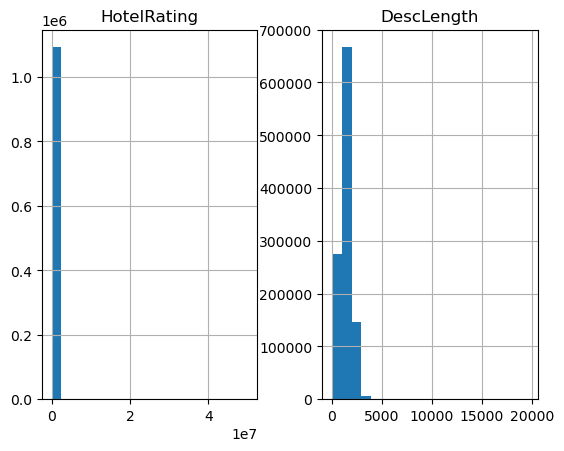

In [24]:
dataframe_analysis.hist(bins=20)

El analisis de la distribucion de los valores de las columnas *HotelRating* and *DescLength* muestra lo siguiente:
* La mayoria de las descripciones tienen menos de 5,000 caracteres
* EL nivel de estrellas del hotel tiene valores incorrectos, mayores de 5

EL primer ajuste a realizar es limitar el conjunto de datos con un nivel de estrellas de 5 o menos.

In [25]:
dataframe_analysis = dataframe_analysis.loc[dataframe_analysis['HotelRating']<=5]

In [26]:
dataframe_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1093051 entries, 0 to 1093094
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   CountryCode  1093051 non-null  object 
 1   HotelRating  1093051 non-null  float64
 2   DescLength   1093051 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 33.4+ MB


array([[<Axes: title={'center': 'HotelRating'}>,
        <Axes: title={'center': 'DescLength'}>]], dtype=object)

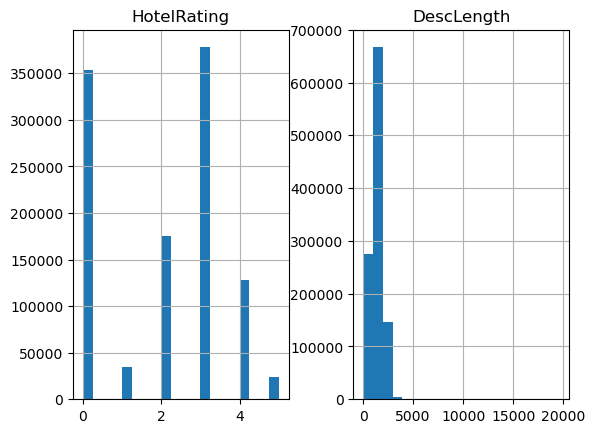

In [27]:
dataframe_analysis.hist(bins=20)

Despues del ajuste se puede observar que el nivel de las estrellas se nivelo con una perdida minima de 44 registros. Sin embargo mas de la tercera parte de los registros, o mas de 350 mil registros, tiene entre 0 y 1 estrella.

El siguiente ajuste a realizar es ver el cambio en la distribucion si se remueven descripciones con mas de 4 mil caractres.

In [28]:
dataframe_analysis = dataframe_analysis.loc[dataframe_analysis['DescLength']<=4000]

In [29]:
dataframe_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1092804 entries, 0 to 1093094
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   CountryCode  1092804 non-null  object 
 1   HotelRating  1092804 non-null  float64
 2   DescLength   1092804 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 33.3+ MB


array([[<Axes: title={'center': 'HotelRating'}>,
        <Axes: title={'center': 'DescLength'}>]], dtype=object)

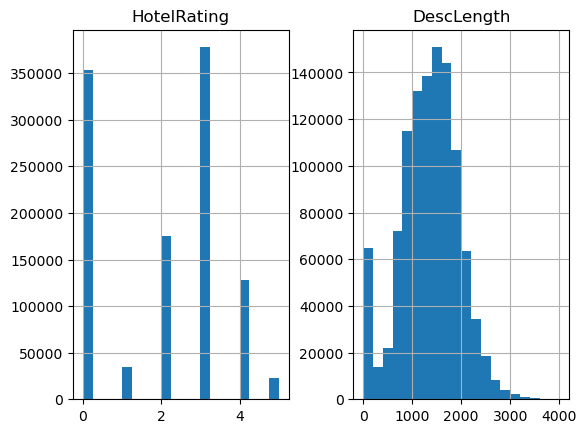

In [30]:
dataframe_analysis.hist(bins=20)

Al remover registros con descripciones con mas de 4 mil caracteres se perdieron otros 247 registros, pero se puede ver que la mayorias de las descripciones tienen entre 500 y 2500 caracteres.

Para analisar la distribucion de los datos en relacion a los paises se va a crear una tabla pivot.

In [31]:
pivot_table = pd.pivot_table(data=dataframe_analysis,index=['CountryCode'],values=['HotelRating'],aggfunc='count')

In [32]:
pivot_table.head(300)

,HotelRating
CountryCode,
,9
11,2
12,1
13,3
14,1
...,...
dk,83
dm,2
do,97


El analisis preliminar revela que hay valores vacios, numeros y combinaciones de codigos de paises en minusculas y/o mayusculas.

In [33]:
dataframe_analysis['CountryCode'] = dataframe_analysis['CountryCode'].str.upper()

In [34]:
pivot_table = pd.pivot_table(data=dataframe_analysis,index=['CountryCode'],values=['HotelRating'],aggfunc='count')

In [38]:
pivot_table.head(300)

,HotelRating
CountryCode,
,9
11,2
12,1
13,3
14,1
...,...
YT,4
ZA,13081
ZM,344


Despues del ajuste a los codigos tambien se puede observar codigos con caracteres especiales.

<Axes: xlabel='CountryCode'>

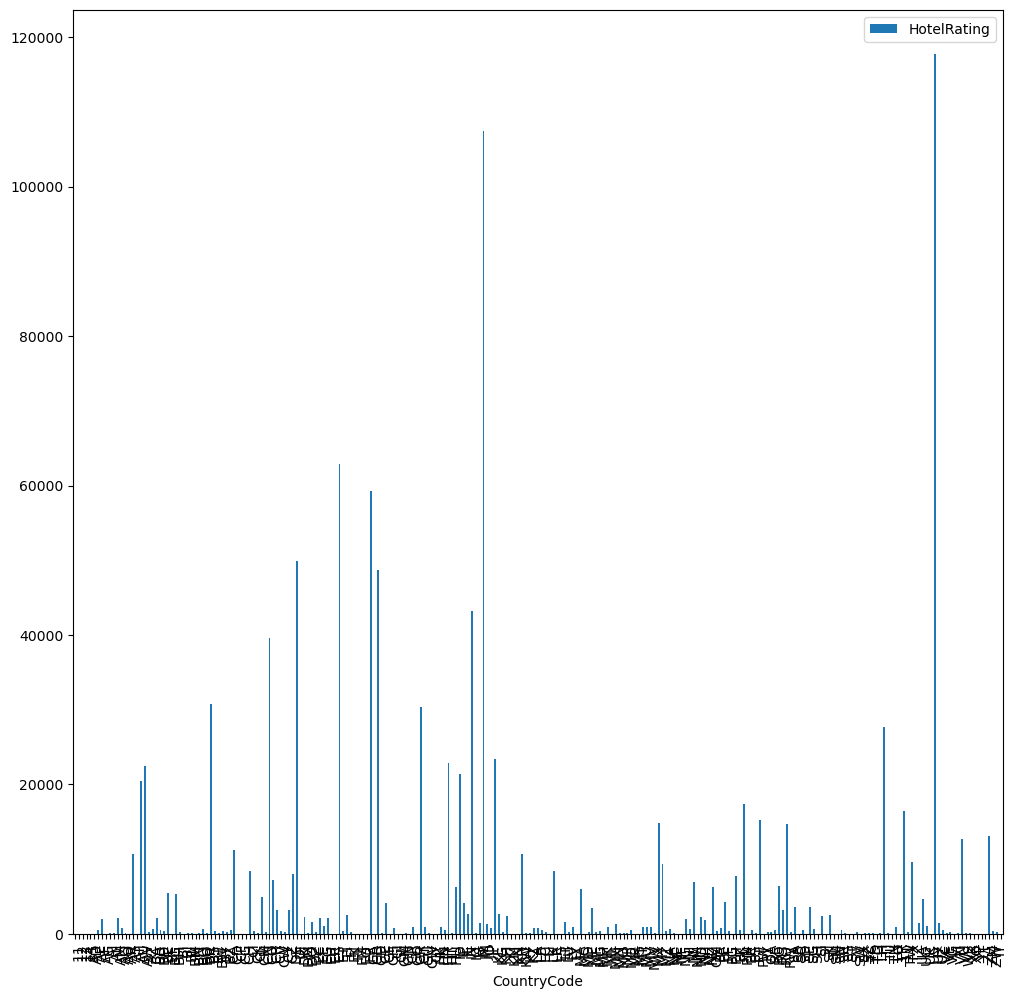

In [35]:
pivot_table.plot(kind='bar',figsize=(12,12))

El histograma de las cuentas de hoteles por codigo de pais muestra que hay paises con mucho hoteles. Para tener una mejor idea de la distribucion la lista de hoteles se reducira a aquellos paises con mas de 40 mil hoteles.

In [36]:
pivot_table_lots = pivot_table.loc[pivot_table['HotelRating']>40000]

In [37]:
pivot_table_lots.head(40)

,HotelRating
CountryCode,
DE,49914
ES,62867
FR,59259
GB,48722
IN,43270
IT,107393
US,117738


La lista de paises resultantes no es sorpresiva y no levanta sospechas por el momento.

**Conclusiones**


El analisis exploratorio de los datos genero muchas revelaciones a considerar para la creacion de una base de conocimiento para *Retrieval-Augmented Generation*, o *RAG*:
* Es necesario limpiar las descripciones para eliminar elementos innecesarios como los elemento de HTML
* Es necesario hacer una limpieza de los hoteles basada en la calidad y la longitud de la descripcion
* Es necesario hacer una limpieza de los codigos del pais ya que son una pieza de informacion importante para la base de conocimiento
* Es necesario presentar opciones de limpieza de datos con el patrocinador del proyecto. La alternativa de eliminar registros que no cumplan con los estandares de calidad acordados puede excluir no mas de 500 hoteles, o menos del 0.05% de la informacion


Es importante discutir con el patrocinador otros criterios para identificar descripciones de hoteles de calidad que se puedan usar para una recomendacion. El analisis exploratorio parace indicar que una descripcion de menos de 300 caracteres no es de gran utilidad aunque hay que acordar el tamanio minimo.

**Referencias**

* ISO. (s.f.) ISO 3166 — Country Codes. Internation Standards Organization. Recuperado 03 de mayo, 2024 de https://www.iso.org/iso-3166-country-codes.html

* Pandas. (s.f.). pandas.pivot_table — pandas 2.2.2 documentation.. Pandas.pydata.org. Recuperado 03 de mayo, 2024 de https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html#
